In [1]:
import numpy as np
import pandas as pd
import os
from tqdm import tqdm

#pour le preprocessing
import re    # Permet d'enlever les emojis
import nltk 
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# pour construire le model et l'entrainer
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns

#Pour visualiser le résultat
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/adri22/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2023-01-03 22:44:35.403676: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [30]:
df0 = pd.read_csv('/Users/adri22/Desktop/AVA-Bot/src/app/Bitcoin.csv')
df0

,tweet
0,#Bitcoin went online 14 years ago today! http...
1,$1 of bitcoin in 2009 is now worth $22 million
2,"The #Bitcoin Network processed $34,238,678,531..."
3,Over 5 million #bitcoin have not moved in half...
4,#Bitcoin is trending to $200 trillion https:/...
...,...
2637,"💰20,010,000 #USDT (20,178,366 USD) move from u..."
2638,"💰25,067,192 #XRP (8,791,893 USD) move from unk..."
2639,"💰10,000,000 #USDT (10,069,806 USD) move from u..."
2640,"💰2,499,998 #USDC (2,507,655 USD) move from #Bi..."


In [31]:
df=df0[['tweet']][0:20000]
df

,tweet
0,#Bitcoin went online 14 years ago today! http...
1,$1 of bitcoin in 2009 is now worth $22 million
2,"The #Bitcoin Network processed $34,238,678,531..."
3,Over 5 million #bitcoin have not moved in half...
4,#Bitcoin is trending to $200 trillion https:/...
...,...
2637,"💰20,010,000 #USDT (20,178,366 USD) move from u..."
2638,"💰25,067,192 #XRP (8,791,893 USD) move from unk..."
2639,"💰10,000,000 #USDT (10,069,806 USD) move from u..."
2640,"💰2,499,998 #USDC (2,507,655 USD) move from #Bi..."


In [32]:
def tweet_to_words(tweet):
    ''' Permet de convertir les tweets en une séquence de mots'''
    

    text = tweet.lower()
    # enlève les caractères
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # on tokenize
    words = text.split()
    # on enlève les stopwords
    words = [w for w in words if w not in stopwords.words("english")]
    # on applique stemming
    words = [PorterStemmer().stem(w) for w in words]

    return words

In [33]:
cleantext=[]
#tqdm permet d'avoir la bare de progression
for item in tqdm(df['tweet']):
    words=tweet_to_words(item)
    cleantext+=[words]
df['cleantext']=cleantext
df

100%|██████████| 2642/2642 [00:25<00:00, 102.53it/s]


,tweet,cleantext
0,#Bitcoin went online 14 years ago today! http...,"[bitcoin, went, onlin, 14, year, ago, today, h..."
1,$1 of bitcoin in 2009 is now worth $22 million,"[1, bitcoin, 2009, worth, 22, million]"
2,"The #Bitcoin Network processed $34,238,678,531...","[bitcoin, network, process, 34, 238, 678, 531,..."
3,Over 5 million #bitcoin have not moved in half...,"[5, million, bitcoin, move, half, decad, user,..."
4,#Bitcoin is trending to $200 trillion https:/...,"[bitcoin, trend, 200, trillion, http, co, qf64..."
...,...,...
2637,"💰20,010,000 #USDT (20,178,366 USD) move from u...","[20, 010, 000, usdt, 20, 178, 366, usd, move, ..."
2638,"💰25,067,192 #XRP (8,791,893 USD) move from unk...","[25, 067, 192, xrp, 8, 791, 893, usd, move, un..."
2639,"💰10,000,000 #USDT (10,069,806 USD) move from u...","[10, 000, 000, usdt, 10, 069, 806, usd, move, ..."
2640,"💰2,499,998 #USDC (2,507,655 USD) move from #Bi...","[2, 499, 998, usdc, 2, 507, 655, usd, move, bi..."


In [34]:
def unlist(list):
    words=''
    for item in list:
        words+=item+' '
    return words

In [35]:
def compute_vader_scores(df, label):
    sid = SentimentIntensityAnalyzer()
    df["vader_neg"] = df[label].apply(lambda x: sid.polarity_scores(unlist(x))["neg"])
    df["vader_neu"] = df[label].apply(lambda x: sid.polarity_scores(unlist(x))["neu"])
    df["vader_pos"] = df[label].apply(lambda x: sid.polarity_scores(unlist(x))["pos"])
    df["vader_comp"] = df[label].apply(lambda x: sid.polarity_scores(unlist(x))["compound"])
    df['cleantext2'] = df[label].apply(lambda x: unlist(x))
    return df

#vader permet d'avoir les sentiments des tweets

In [36]:
df2 = compute_vader_scores(df,'cleantext')
df2

,tweet,cleantext,vader_neg,vader_neu,vader_pos,vader_comp,cleantext2
0,#Bitcoin went online 14 years ago today! http...,"[bitcoin, went, onlin, 14, year, ago, today, h...",0.0,1.000,0.000,0.0000,bitcoin went onlin 14 year ago today http co i...
1,$1 of bitcoin in 2009 is now worth $22 million,"[1, bitcoin, 2009, worth, 22, million]",0.0,0.678,0.322,0.2263,1 bitcoin 2009 worth 22 million
2,"The #Bitcoin Network processed $34,238,678,531...","[bitcoin, network, process, 34, 238, 678, 531,...",0.0,0.705,0.295,0.5574,bitcoin network process 34 238 678 531 worth t...
3,Over 5 million #bitcoin have not moved in half...,"[5, million, bitcoin, move, half, decad, user,...",0.0,0.796,0.204,0.7096,5 million bitcoin move half decad user everyda...
4,#Bitcoin is trending to $200 trillion https:/...,"[bitcoin, trend, 200, trillion, http, co, qf64...",0.0,1.000,0.000,0.0000,bitcoin trend 200 trillion http co qf64gud6gt
...,...,...,...,...,...,...,...
2637,"💰20,010,000 #USDT (20,178,366 USD) move from u...","[20, 010, 000, usdt, 20, 178, 366, usd, move, ...",0.0,1.000,0.000,0.0000,20 010 000 usdt 20 178 366 usd move unknown wa...
2638,"💰25,067,192 #XRP (8,791,893 USD) move from unk...","[25, 067, 192, xrp, 8, 791, 893, usd, move, un...",0.0,1.000,0.000,0.0000,25 067 192 xrp 8 791 893 usd move unknown wall...
2639,"💰10,000,000 #USDT (10,069,806 USD) move from u...","[10, 000, 000, usdt, 10, 069, 806, usd, move, ...",0.0,1.000,0.000,0.0000,10 000 000 usdt 10 069 806 usd move unknown wa...
2640,"💰2,499,998 #USDC (2,507,655 USD) move from #Bi...","[2, 499, 998, usdc, 2, 507, 655, usd, move, bi...",0.0,1.000,0.000,0.0000,2 499 998 usdc 2 507 655 usd move bitfinex unk...


# Utilisation de Vader

<AxesSubplot: title={'center': 'sentiment analysis'}>

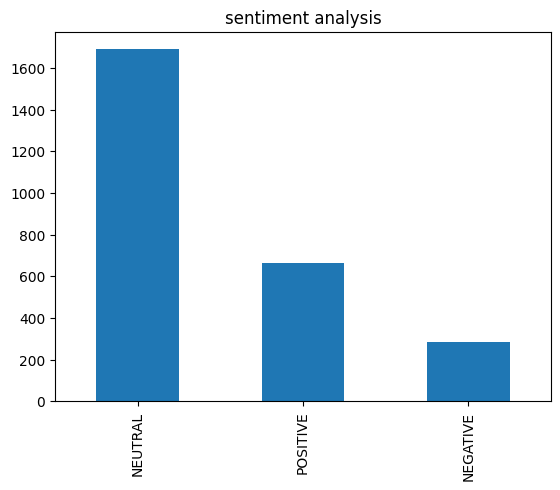

In [37]:




df2.loc[df2.vader_comp>0,'sentiment_type']='POSITIVE'
df2.loc[df2.vader_comp==0,'sentiment_type']='NEUTRAL'
df2.loc[df2.vader_comp<0,'sentiment_type']='NEGATIVE'

df2.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis")


# Utilisation de TextBlob

In [38]:
from textblob import TextBlob

new_df=df
new_df['tweet'] = df['tweet'].astype('str')
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

new_df['Polarity'] = df['tweet'].apply(get_polarity)

In [39]:
new_df['Sentiment_Type']=''
new_df.loc[df.Polarity>0,'Sentiment_Type']='POSITIVE'
new_df.loc[df.Polarity==0,'Sentiment_Type']='NEUTRAL'
new_df.loc[df.Polarity<0,'Sentiment_Type']='NEGATIVE'

<AxesSubplot: title={'center': 'Sentiment Analysis'}>

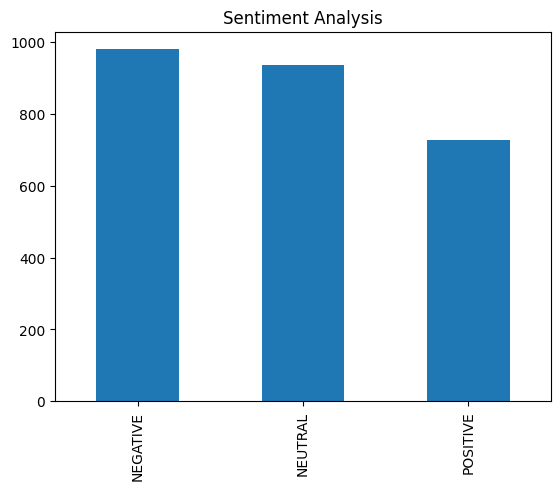

In [40]:
new_df.Sentiment_Type.value_counts().plot(kind='bar',title="Sentiment Analysis")


# Utilisation de Vader sans clean le text

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/adri22/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


<AxesSubplot: title={'center': 'sentiment analysis'}>

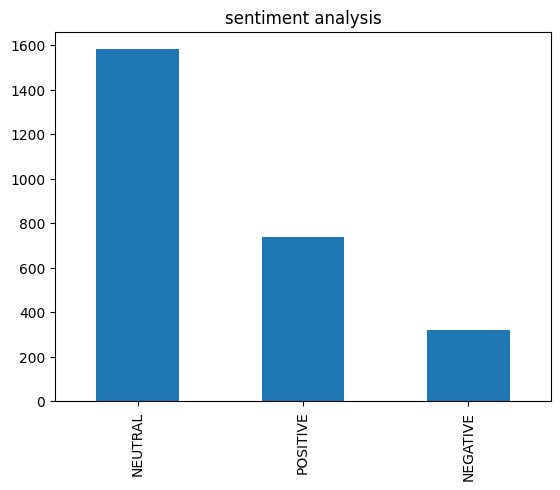

In [42]:
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

new_df['scores'] = df['tweet'].apply(lambda tweet: sid.polarity_scores(tweet))

new_df['compound'] = new_df['scores'].apply(lambda score_dict: score_dict['compound'])
new_df['sentiment_type']=''
new_df.loc[df.compound>0,'sentiment_type']='POSITIVE'
new_df.loc[df.compound==0,'sentiment_type']='NEUTRAL'
new_df.loc[df.compound<0,'sentiment_type']='NEGATIVE'

new_df.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis")


In [43]:
class0=[]
for i in range(len(df2)):
    if df2.loc[i,'vader_neg']>0:
        class0+=[0]
    elif df2.loc[i,'vader_pos']>0:
        class0+=[2]        
    else:
        class0+=[1]     


In [44]:
df['class']=class0
df['class'].value_counts()

1    1686
2     539
0     417
Name: class, dtype: int64

In [45]:

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 5000
max_len=50

def tokenize_pad_sequences(text):
    '''
    Cette fonction tokenize pour avoir des integers et met de la même taille avec le pad
    '''
    # tokenization du texte
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # on transforme le texte en une séquence d'integers 
    X = tokenizer.texts_to_sequences(text)
    # on met la même longueur avec le padding des phrases
    X = pad_sequences(X, padding='post', maxlen=max_len)
    return X, tokenizer

print('Avant tokenisation et Padd  \n', df['cleantext2'][0])
X, tokenizer = tokenize_pad_sequences(df['cleantext2'])
print('Après tokénization \n', X[0])

Avant tokenisation et Padd  
 bitcoin went onlin 14 year ago today http co ifxugbgnj 
Après tokénization 
 [  18  905 1672   57   44  147  202    2    1 3435    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [46]:
y = pd.get_dummies(df['class'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

print('Train Set: ', X_train.shape, y_train.shape)
print('Validation Set: ', X_val.shape, y_val.shape)
print('Test Set: ', X_test.shape, y_test.shape)

Train Set:  (1584, 50) (1584, 3)
Validation Set:  (529, 50) (529, 3)
Test Set:  (529, 50) (529, 3)


In [47]:
import tensorflow.keras.backend as K

def f1_score(precision, recall):
    ''' calcule la precision '''
    
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    print(f1_val)
    return f1_val


In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout, Flatten
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import datasets
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import History
from tensorflow.keras import losses

In [49]:
vocab_size = 5000
embedding_size = 32
epochs = 10
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

In [50]:
sgd = SGD(learning_rate=learning_rate, momentum=momentum,  nesterov=False)
# on build le modèle
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))


In [51]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy', Precision(), Recall()])

history = model.fit(X_train,y_train,validation_data=(X_val, y_val),batch_size=64,epochs=epochs,verbose=1)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
Epoch 1/10
25/25 [==============================] - 12s 101ms/step - loss: 0.9259 - accuracy: 0.6218 - precision_1: 0.6426 - recall_1: 0.5574 - val_loss: 0.9276 - val_accuracy: 0.6163 - val_precision_1: 0.6163 - val_recall_1: 0.6163
Epoch 2/10
25/25 [==============================] - 1s 29ms/step - loss: 0.9064 - accuracy: 0.6427 - precision_1: 0.6427 - recall_1: 0.6427 - val_loss: 0.9253 - val_accuracy: 0.6163 - val_precision_1: 0.6163 - val_recall_1: 0.6163
Epoch 3/10
25/25 [==============================] - 1s 36ms/step - loss: 0.8987 - accuracy: 0.6427 - precision_1: 0.6427 - recall_1: 0.6427 - val_loss: 0.9272 - val_accuracy: 0.6163 - val_precision_1: 0.6163 - val_recall_1: 0.6163
Epoch 4/10
25/25 [==============================] - 1s 29ms/step - loss: 0.8964 - accuracy: 0.6427 - precision_1: 0.6427 - recall_1: 0.6427 - val_loss: 0.91


Accuracy  : 0.7183
Precision : 0.8693
Recall    : 0.5784
0.694665106576944
F1 Score  : 0.6947


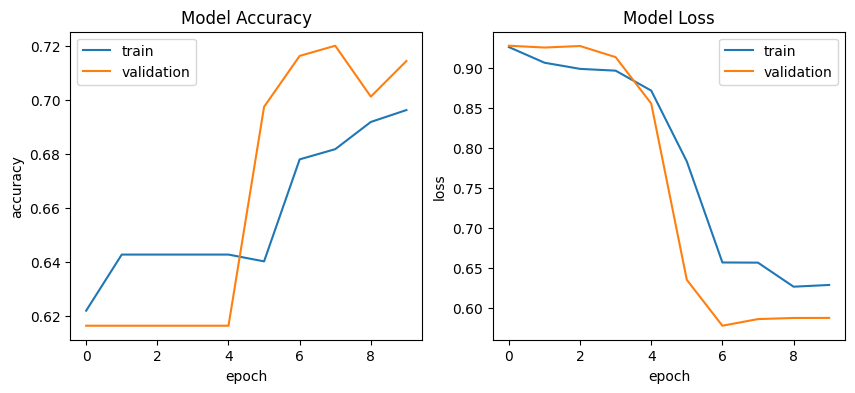

In [52]:
# On evalue le modèle avec test
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
# on print les metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))

def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1,2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history)

17/17 [==============================] - 2s 10ms/step
1    342
2    112
0     75
dtype: int64
1    399
0     94
2     36
dtype: int64


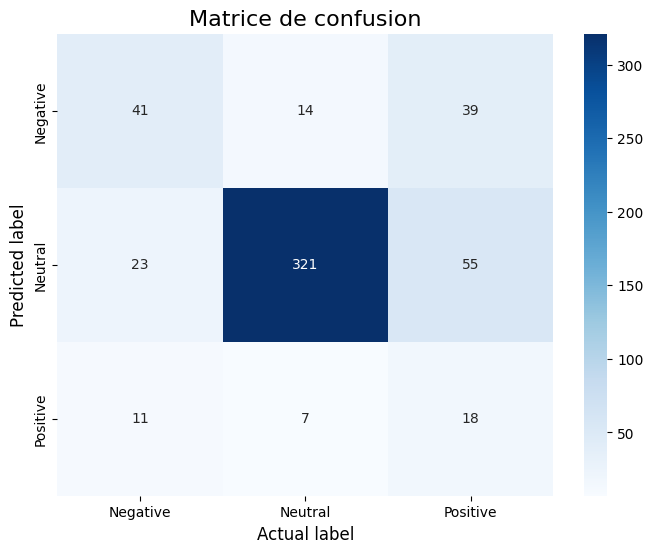

In [53]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test):
    '''on sort la matrice de confusion avec la data et les anciennes données '''
    
    sentiment_classes = ['Negative','Neutral', 'Positive']
    # on utilise le modèle pour la prédiction
    y_pred = model.predict(X_test)
   
    cm = confusion_matrix(np.argmax(y_pred, axis=1),np.argmax(np.array(y_test),axis=1))
    
    print(pd.Series(np.argmax(np.array(y_test),axis=1)).value_counts())
    print(pd.Series(np.argmax(y_pred, axis=1)).value_counts())
    

    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Matrice de confusion', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)
    
plot_confusion_matrix(model, X_test, y_test)